In [1]:
import os
import sys
import codecs
import scanpy as sc

In [2]:
adata = sc.read_10x_mtx('D:/MyData/scEDGE_Generation/data/frozen_pbmc_donor_a_filtered_gene_bc_matrices/filtered_matrices_mex/hg19/', var_names='gene_symbols', cache=True)

In [3]:
adata

AnnData object with n_obs × n_vars = 2900 × 32738
    var: 'gene_ids'

In [4]:
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [5]:
#线粒体DNA（英语：mitochondrial DNA，缩写作mtDNA）指一些位于线粒体内的DNA，
#与一般位于细胞核内的DNA有不同的演化起源，可能是源自早期细菌。
#虽然现存生物体中绝大多数作用于线粒体的蛋白质，是由细胞核DNA所制造，
#但这些基因中有一些可能是源于细菌，并于演化过程中转移到细胞核中，称为核内线粒体片段。
adata.var_names.str.startswith('MT-')

array([False, False, False, ..., False, False, False])

In [6]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [7]:
adata.var['mt'].value_counts()

False    32725
True        13
Name: mt, dtype: int64

In [8]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [9]:
adata = adata[adata.obs.n_genes_by_counts < 2000, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [10]:
adata

View of AnnData object with n_obs × n_vars = 2843 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\pytorch\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [12]:
adata.raw = adata

In [13]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/PBMC/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/PBMC/processed')

adata.write('D:/MyData/scEDGE_Generation/data/PBMC/processed/PBMC.h5ad')

In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata)

In [15]:
marker_genes = ['S100A9', 'GZMH', 'HLA-DRB5', 'RP11-290F20.3', 'CD7', 'LTB', 'LYZ', 'RPS5', 'CD74', 'GZMA', 'RPS8',
                'FCER1G', 'RPL32', 'GNLY', 'S100A8', 'B2M', 'LST1', 'RPS13', 'HLA-DQA1', 'RPL11', 'S100A10', 'RPLP2',
                'RPS2', 'S100A6', 'S100A4', 'LYAR', 'HLA-DRB1', 'AIF1', 'CCL5', 'TYROBP', 'CD52', 'IL7R', 'CTSW',
                'HLA-DPB1', 'CLIC3', 'CD79B', 'FTH1', 'HLA-DPA1', 'CST3', 'RPL31', 'FTL', 'RPL13', 'FXYD5', 'RPS6',
                'CD79A', 'GZMK', 'NKG7', 'HLA-B', 'IL32', 'HLA-DRA']

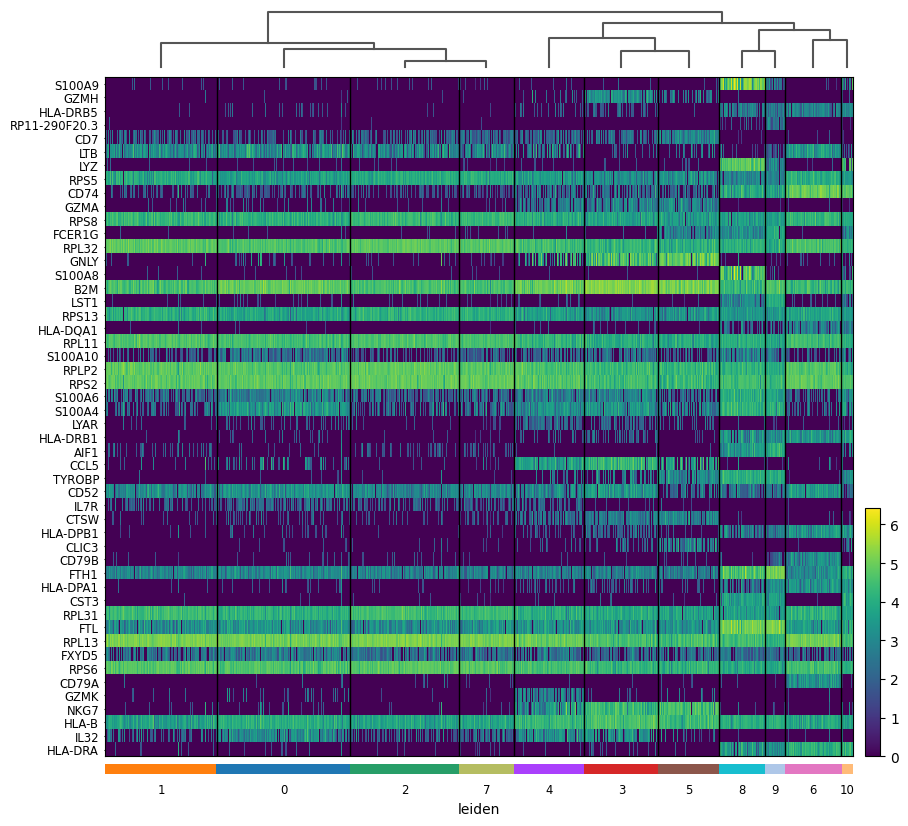

In [16]:
sc.pl.heatmap(adata, marker_genes, groupby='leiden', dendrogram=True, swap_axes=True, use_raw=True)

In [17]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,leiden
AAACATTGCACTAG-1,1022,2325.0,67.0,2.881721,1022,5
AAACATTGGCTAAC-1,633,1827.0,32.0,1.751505,633,6
AAACATTGTAACCG-1,614,2103.0,41.0,1.949596,614,2
AAACCGTGTGGTCA-1,617,1653.0,26.0,1.572898,617,5
AAACCGTGTTACCT-1,585,1563.0,18.0,1.151631,585,6
...,...,...,...,...,...,...
TTTCGAACTGTCAG-1,640,2325.0,43.0,1.849462,640,2
TTTCTACTTGTCGA-1,462,1397.0,17.0,1.216893,462,1
TTTGCATGATCTTC-1,691,2629.0,52.0,1.977938,691,2
TTTGCATGGGAGCA-1,745,1549.0,29.0,1.872176,745,5


In [18]:
adata.obs['leiden'] = adata.obs['leiden'].astype('category')

In [19]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,leiden
AAACATTGCACTAG-1,1022,2325.0,67.0,2.881721,1022,5
AAACATTGGCTAAC-1,633,1827.0,32.0,1.751505,633,6
AAACATTGTAACCG-1,614,2103.0,41.0,1.949596,614,2
AAACCGTGTGGTCA-1,617,1653.0,26.0,1.572898,617,5
AAACCGTGTTACCT-1,585,1563.0,18.0,1.151631,585,6
...,...,...,...,...,...,...
TTTCGAACTGTCAG-1,640,2325.0,43.0,1.849462,640,2
TTTCTACTTGTCGA-1,462,1397.0,17.0,1.216893,462,1
TTTGCATGATCTTC-1,691,2629.0,52.0,1.977938,691,2
TTTGCATGGGAGCA-1,745,1549.0,29.0,1.872176,745,5


In [21]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
adata.obsm['X_tsne'] = tsne.fit_transform(adata.obsm['X_pca'])

D:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


D:\Anaconda3\envs\pytorch\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


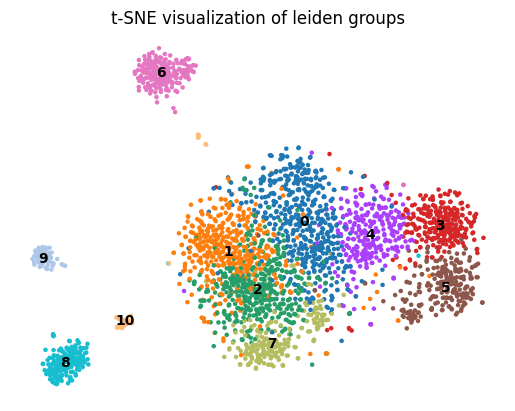

In [22]:
sc.pl.tsne(adata, color='leiden', legend_loc='on data', title='t-SNE visualization of leiden groups', frameon=False)